<a href="https://colab.research.google.com/github/UCR-Research-Computing/Useful-Google-Colab-Notebooks/blob/main/Stable_Diffusion_Custom_Instance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Check if we have a GPU with Nvidia-smi
!nvidia-smi

In [2]:
#@title Run to mount Google Drive to store your images
from google.colab import drive
drive.mount('/content/google_drive')

Mounted at /content/google_drive


In [ ]:
#@title Install diffuser, transformers, scipy, ftfy, ipywidgets
!pip install diffusers==0.4.0
!pip install transformers scipy ftfy
!pip install "ipywidgets>=7,<8"

This uses the Stable diffusion model hosted on [huggingface.com](huggingface.com). You'll need to go there and create a account. You also need to accept the model license before downloading or using the weights. In this post we'll use model version `v1-4`, so you'll need to  visit [its card](https://huggingface.co/CompVis/stable-diffusion-v1-4), read the license and tick the checkbox if you agree. 

You have to be a registered user in 🤗 Hugging Face Hub, and you'll also need to use an access token for the code to work. For more information on access tokens, please go here [Your hugging face access token](https://huggingface.co/settings/tokens).

As google colab has disabled external widgtes, we need to enable it explicitly. Run the following cell to be able to use `notebook_login`

In [4]:
#@title Enable custom Widgets
from google.colab import output
output.enable_custom_widget_manager()

Now you can login with your user token. here [Your hugging face access token](https://huggingface.co/settings/tokens)

In [5]:
#@title Enter Huggingface api key
from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token


In [ ]:
#@title Install torch and load the model { run: "auto", vertical-output: true }
import torch
from diffusers import StableDiffusionPipeline

# make sure you're logged in with `huggingface-cli login`
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", revision="fp16", torch_dtype=torch.float16)  
#pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")  

pipe = pipe.to("cuda")

import random

beautiful castle in the forest with a waterfall, art by Josef Thoma


  0%|          | 0/51 [00:00<?, ?it/s]

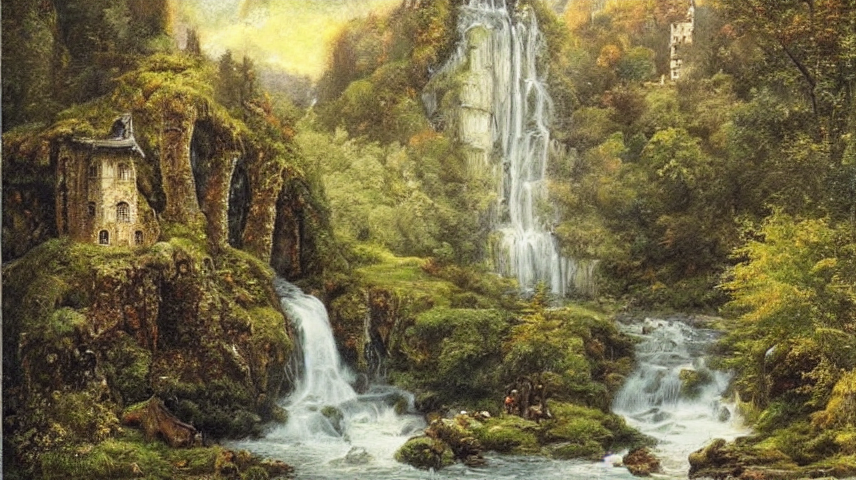

In [9]:
#@title Single Run


#prompt = "the ocean, highly detailed, highly detailed, digital painting, trending on artstation, concept art, sharp focus, illustration, art by artgerm and greg rutkowski and magali villeneuve"
#@markdown ### Examples: ###
#@markdown * the ocean at night with stars in the sky, by Josef Thoma, matte painting, trending on artstation HQ
#@markdown * wizard, wearing adventure coat, 3d action pose, steampunk, lantern, realengine, trending on artstation HQ
#@markdown * forest underwater with grass and plants and fish, intricate, elegant, highly detailed, digital painting, artstation, concept art, smooth, sharp focus, illustration, magic all around, photorealism, octane render, 8k, cinematic, 35mm
#@markdown * the ocean at night with stars and planets in the sky, studio ghibli, highly detailed, d & d, fantasy, highly detailed, digital painting, trending on artstation, concept art, sharp focus, illustration, art by artgerm and greg rutkowski and magali villeneuve
#@markdown * Cluttered house in the woods with mist and magic and stars in the sky, anime, oil painting, high resolution, cottagecore, ghibli inspired, 4k
prompt = "beautiful castle in the forest with a waterfall, art by Josef Thoma" #@param {type:"string"}

cleanprompt = prompt.replace(" ", "_")
print(prompt)
filename = "./google_drive/MyDrive/sdimages/%s_%s.png" % (cleanprompt, random.randint(0, 9999999)) 

with open("./google_drive/MyDrive/sdimages/prompt_history.txt", "a+") as file_object:
    file_object.seek(0)
    data = file_object.read(100)
    if len(data) > 0 :
        file_object.write("\n")
    file_object.write("%s : %s" % (prompt, filename))

#image = pipe(prompt).images[0]
#mage = pipe(prompt, height=768, width=512).images[0]
#image = pipe(prompt, height=512, width=768).images[0]
image = pipe(prompt, height=480, width=856).images[0]
#image = pipe(prompt, height=1920, width=1080).images[0]
image.save(f"%s" % filename)
image

In [ ]:
#@title Create a number of images
count = 10 #@param {type:"slider", min:1, max:1000, step:1}

for x in range(count):
    
    #filename = "./images/%s_%s.png" % (cleanprompt, random.randint(0, 9999999)) 
    filename = "./google_drive/MyDrive/sdimages/%s_%s.png" % (cleanprompt, random.randint(0, 9999999))

    #image = pipe(prompt).images[0]
    #image = pipe(prompt, height=768, width=512).images[0]
    image = pipe(prompt, height=512, width=856).images[0]
    #image = pipe(prompt, height=1920, width=1080).images[0]
    image.save(f"%s" % filename)
    image
    print(x)